# Introduction to Matplotlib

## What is Matplotlib?

Matplotlib is a plotting library for Python that allows you to create graphs and charts based on data from dataframes in pandas and NumPy arrays for example.

!["Matplotlib Workflow"](../../assets/images/notes/018-matplotlib-workflow.png)

## Anatomy of a Matplotlib Plot / Figure

!["Anatomy of a Matplotlib Plot / Figure"](../../assets/images/notes/019-matplotlib-plot-anatomy.png)

## Creating Plots

### Import Required Libraries

In [5]:
# --- %matplotlib inline will ensure that the plots / figures show up in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Create A Plot / Figure (empty)

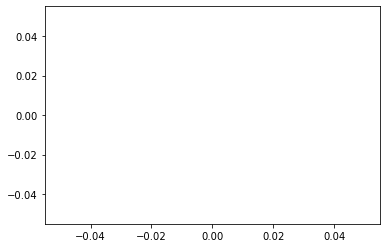

In [6]:
# --- This will create an empty plot, also called a figure) as no values 
# --- have been passed to plt against:
plt.plot()
plt.show()

### Create A Plot / Figure (Basic X & Y)

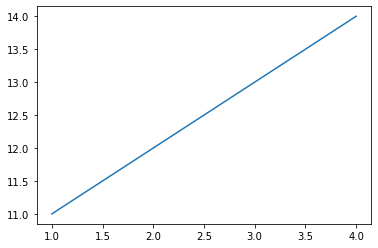

In [7]:
# --- Define two lists, one for each axis:
x_axis = [1, 2, 3, 4]
y_axis = [11, 12, 13, 14]

# --- Create a new figure with plot data from the two lists:
plt.plot(x_axis, y_axis)
plt.show()

Now, the above two plots were made using what is called the pyplot API. This method offers the least amount of flexibility in what you can do with it but it is quicker. It is also not recommended by the Matplotlib developers.

The second method is called the object-orientated API. This allows for a lot more flexibility and customisation of a plot. Lets take a look at that method.

<class 'list'>


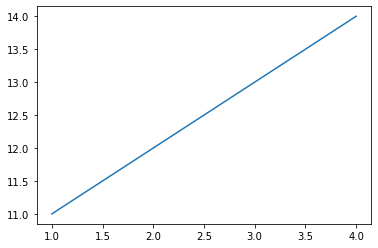

In [13]:
# --- There are other methods to this but this is recommended:

# --- Create a figure for the plot chart:
fig, ax = plt.subplots()

# --- Show the plot with the x and y axis data.
# --- The ; will remove the list object details that appear above the plot.
ax.plot(x_axis, y_axis);

Each time you run the plot, it will create it from scratch, rather than keep it buffered.

## Matplotlib Example Workflow

The below is an example Matplotlib workflow from beginning to end.

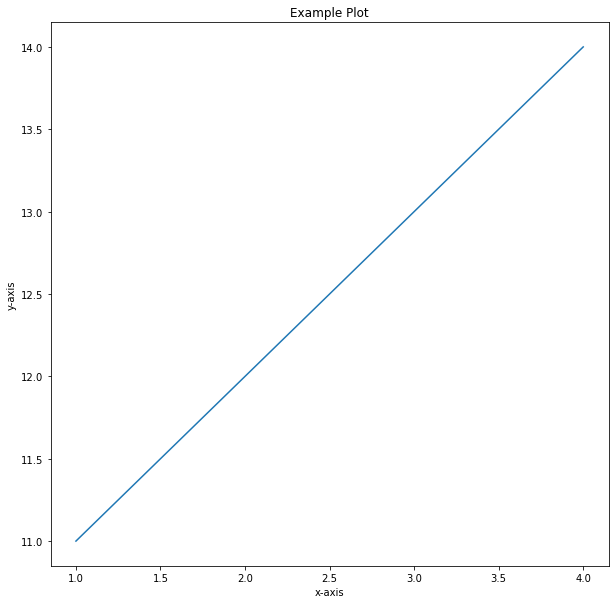

In [31]:
# --- Import the required libraries:
%matplotlib inline

import matplotlib.pyplot as plt

# --- Prepare the data to be used in the plot / figure:
x = [1, 2, 3, 4]
y = [11, 12, 13, 14]

# --- Setup the plot / figure:
# --- figsize is width and height.
fig, ax = plt.subplots(figsize = (10, 10))

# --- Customise the plot:
ax.set(title  = "Example Plot",
       xlabel = "x-axis",
       ylabel = "y-axis")

# --- Add the data to the plot so it can be plotted:
ax.plot(x, y)

# --- Save and show the figure
# --- Note: png file type doesn't seem to save anything but the line. JPEG & SVG works fine.
fig.savefig(fname  = "example-plot.jpg", 
            format = "jpg")